<a href="https://colab.research.google.com/github/nithinbadi/Alfido-Tech/blob/main/titanic_survival_prediction_nithin_badi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data from github raw link
Link - https://raw.githubusercontent.com/nithinbadi/Alfido-Tech/main/TitanicSurvivalPrediction/titanic_dataset.csv

Dataset via Kaggle - https://www.kaggle.com/datasets/brendan45774/test-file
- Convert to Pandas dataframe to make it accesible
- Print the shape and do some EDA on the data to understand it a little better.

In [25]:
filename = 'https://raw.githubusercontent.com/nithinbadi/Alfido-Tech/main/TitanicSurvivalPrediction/titanic_dataset.csv'

import pandas as pd

df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df.shape

(418, 12)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [28]:
# dropping cabin as too many null values - doesn't provide enough information
df.drop('Cabin',axis=1,inplace=True)

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Replacing the null values via `fillna`

In [30]:
for col in df.columns:
  if df[col].isnull().sum()!=0:
    df[col].fillna(df[col].mode()[0],inplace=True)
    # df[col]= df[col].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


## Converting the data into machine friendly data
-  Categorical data into numerical values the machine can understand via `LabelEncoder`
- Before doing so we will split the input and output into X and y.
- And we will drop the name column as it is not neccessary in the analysis.
- We will store the PassengerId in a separate variable and drop it as well.

In [32]:
from sklearn.preprocessing import LabelEncoder,StandardScaler


X = df.drop('Survived',axis=1)
y = df['Survived']


le = LabelEncoder()


In [33]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [34]:
X.drop(['Name','Ticket'],axis=1,inplace=True)

In [35]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [36]:
passengerId = df[['PassengerId','Survived']]
X.drop('PassengerId',axis=1,inplace=True)

In [37]:
passengerId.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [38]:
for col in X.columns:
  if X[col].dtype == 'O':
    X[col] = pd.Series(le.fit_transform(X[col]))

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [40]:
X['Age'] = round(X['Age'])
X['Age'] = X['Age'].astype(int)

In [41]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,2
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,2
4,3,0,22,1,1,12.2875,2


## Lets plot some graphs to understand the data

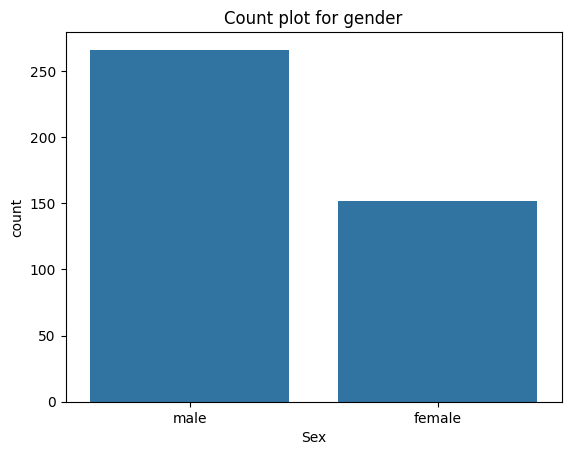

In [42]:
sns.countplot(x='Sex',data=df)
plt.title('Count plot for gender');

Text(0.5, 1.0, 'Count plot for Pclass')

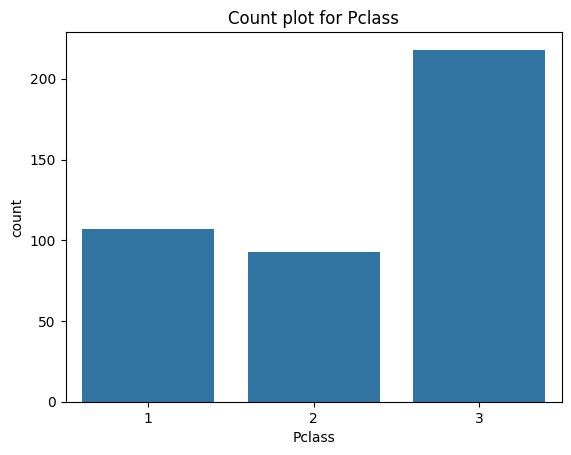

In [43]:
sns.countplot(x='Pclass',data=df)
plt.title('Count plot for Pclass')

<Axes: xlabel='Survived', ylabel='count'>

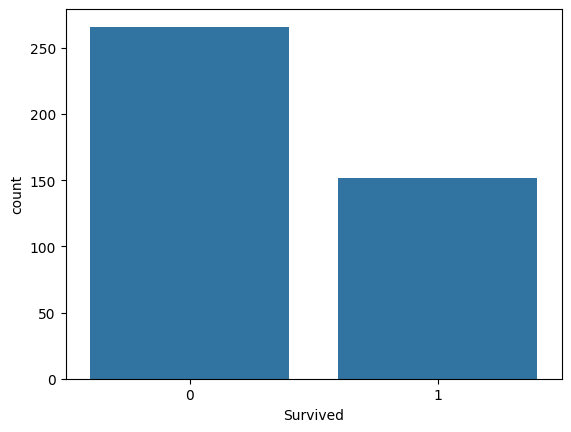

In [44]:
sns.countplot(x='Survived',data=df)

- The Survived feature is under represented by those who survived as to those who didn't survive.

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res,y_res = ros.fit_resample(X,y)

## Let's split the data into train and test and build the model
- From sklearn.linear_model we're going to be using `LogisticRegression`
- From sklearn.tree we're going to be using `DecisionTreeClassifier`
- From sklearn.ensemble we're going to be using `RandomForestClassifier`

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((425, 7), (107, 7), (425,), (107,))

In [47]:
from sklearn.linear_model  import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [50]:
y_preds = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        56

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [48]:
from sklearn.tree import DecisionTreeClassifier

dcr = DecisionTreeClassifier()

dcr.fit(X_train,y_train)
dcr.score(X_test,y_test)


1.0

In [51]:
y_preds_dcr = dcr.predict(X_test)

print(classification_report(y_test,y_preds_dcr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        56

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [54]:
y_preds_rfc = rfc.predict(X_test)


print(classification_report(y_test,y_preds_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        56

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

